* #################################################
* 2024 공공데이터분석 중간고사 001분반 2024.04.29 (월)
* #################################################

In [1]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# 캔버스에서 1) ipynb 시험파일, 2) html 시험파일, 3) 데이터를 다운로드.
 
# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 import 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (주어진 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 중간고사> 에 업로드.
# (시스템 문제로 캔버스제출이 아닌 이메일로 제출하는 경우 ipynb 시험 파일은 파일명 수정하여 제출:
#    --> 이름_학번_2024중간고사_공공데이터분반00x.ipynb)

In [9]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
# plt.rc("font", family="Malgun Gothic") # window
plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.13.1 (main, Dec  3 2024, 17:59:52) [Clang 16.0.0 (clang-1600.0.26.4)]
numpy 2.2.5
pandas 2.2.3
matplotlib 3.10.1
seaborn 0.13.2


# 문제1
* 9명 학생의 점수가 있는데 중간에 결측치가 있다. 각 결측치는 학생이 포함된 class의 평균으로 채운 dataframe df1a를 만들려고 한다.
* 아래의 주어진 코드를 완성하여 df1a를 출력하시오
* (힌트: concat 사용)

In [10]:
df1=pd.read_table('data/mid_prob1.txt', sep='\t', index_col=0)
df1

ave_A=df1.loc[df1['class']=='A', 'score'].mean()
ave_B=df1.loc[df1['class']=='B', 'score'].mean()

## 코드 작성 ##
df_A=df1.loc[df1['class']=='A']
df_B=df1.loc[df1['class']=='B']

df_A=df_A.fillna(ave_A)
df_B=df_B.fillna(ave_B)

df1a=pd.concat([df_A, df_B]).sort_index()
## 코드 작성 끝 ##

df1a

,class,score
st_num,,
1,A,20.0
2,B,40.0
3,A,NaN
4,A,30.0
5,B,NaN
6,B,30.0
7,A,25.0
8,B,23.0
9,B,NaN


,class,score
st_num,,
1,A,20.0
2,B,40.0
3,A,25.0
4,A,30.0
5,B,31.0
6,B,30.0
7,A,25.0
8,B,23.0
9,B,31.0


# 문제2
* df2의 "지역명" column을 mask하려고 한다.
* 우선 "전북"은 "@"로 바꾸고, 남은 지역 중, "북"이라는 글자가 있는 경우 "북"을 "$"로 바꿔서 "masked_지역명" 컬럼에 담으시오

In [11]:
df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','
df_last_nn=df_last.loc[df_last['분양가격(제곱미터)'].notnull()]
df_last_nn=df_last_nn.copy()
df_last_nn['분양가격(제곱미터)']=pd.to_numeric(df_last_nn['분양가격(제곱미터)'], errors='coerce')
df_last_nn=df_last_nn.loc[df_last_nn['분양가격(제곱미터)'].notnull()]
df2=df_last_nn.iloc[::430].iloc[:13]
df2

## 코드 작성 ##
df2['masked_지역명']=df2['지역명'].str.replace("전북","@").str.replace("북",'$')
## 코드 작성 끝 ##

df2

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
451,광주,전용면적 60제곱미터이하,2016,3,2470.0
903,충북,전용면적 85제곱미터초과 102제곱미터이하,2016,8,2321.0
1339,전북,전용면적 102제곱미터초과,2017,1,2321.0
1776,경남,전용면적 60제곱미터이하,2017,6,2495.0
2234,대구,전용면적 102제곱미터초과,2017,12,3543.0
2719,제주,전용면적 102제곱미터초과,2018,5,3029.0
3195,충북,모든면적,2018,11,2367.0
3671,부산,전용면적 60제곱미터이하,2019,5,3789.0
4153,경북,전용면적 85제곱미터초과 102제곱미터이하,2019,10,2604.0


,지역명,규모구분,연도,월,분양가격(제곱미터),masked_지역명
0,서울,모든면적,2015,10,5841.0,서울
451,광주,전용면적 60제곱미터이하,2016,3,2470.0,광주
903,충북,전용면적 85제곱미터초과 102제곱미터이하,2016,8,2321.0,충$
1339,전북,전용면적 102제곱미터초과,2017,1,2321.0,@
1776,경남,전용면적 60제곱미터이하,2017,6,2495.0,경남
2234,대구,전용면적 102제곱미터초과,2017,12,3543.0,대구
2719,제주,전용면적 102제곱미터초과,2018,5,3029.0,제주
3195,충북,모든면적,2018,11,2367.0,충$
3671,부산,전용면적 60제곱미터이하,2019,5,3789.0,부산
4153,경북,전용면적 85제곱미터초과 102제곱미터이하,2019,10,2604.0,경$


# => 문제를 위한 전처리 코드
* ########################################
* df_last => 전처리 => df_prep 
* 아래 문제들에서 df_prep 사용됨
* ########################################

In [12]:
df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','

### 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_prep=df_last.loc[df_last['분양가격(제곱미터)'].notnull()]

### 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형, 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_prep=df_prep.copy()
df_prep['분양가격(제곱미터)']=pd.to_numeric(df_prep['분양가격(제곱미터)'], errors='coerce')
df_prep=df_prep.loc[df_prep['분양가격(제곱미터)'].notnull()]

### 3) 평당분양가격 column 추가
df_prep["평당분양가격"]=df_prep['분양가격(제곱미터)'] * 3.3

### 4) 전용면적 column 추가
def area_prep(x):
    x2=x.replace("모든면적","전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("60이하", "~60").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3

df_prep["전용면적"] = df_prep["규모구분"].map(area_prep)

### 5) 필요없는 column 제거
df_prep=df_prep.drop(columns=['규모구분','분양가격(제곱미터)'], errors='ignore')

df_prep.head()


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


# 문제3
* 주어진 df3의 연도별 평당분양가격 최대값을 bar그래프로 그리시오
* (단, pandas plot 사용)

<Axes: xlabel='연도'>

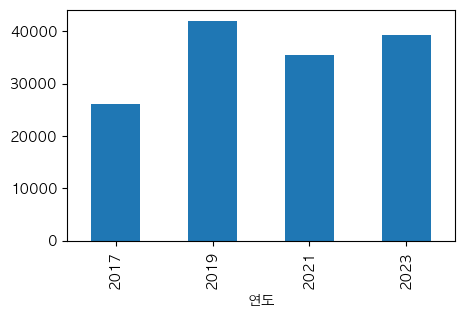

In [13]:
fig=plt.figure(figsize=(5,3))
ax1 = fig.subplots()

df3=df_prep.loc[df_prep['연도'].isin([2017,2019,2021,2023])]

## 코드 작성 ##
sr3=df3.groupby('연도')['평당분양가격'].max()
sr3.plot.bar(ax=ax1)
## 코드 작성 끝 ##

# 문제4
* 주어진 df4에서
* "지역"별로, 평당분양가격 평균과 중앙값을 구하고,
* 평균>=중앙값인 경우는 문자열 "A>=M",
* 평균<중앙값인 경우는 문자열 "A<M"을 담은 series sr4를 출력하시오

In [14]:
df4=df_prep.copy()

## 코드 작성 ##
def func_prob4(sr1):
    a1=sr1.mean()
    m1=sr1.median()
    if a1>=m1:
        return "A>=M"
    else:
        return "A<M"
        
sr4=df4.groupby('지역명')['평당분양가격'].apply(func_prob4)
## 코드 작성 끝 ##
sr4

지역명
강원    A>=M
경기    A>=M
경남    A>=M
경북    A>=M
광주    A>=M
대구     A<M
대전    A>=M
부산    A>=M
서울    A>=M
세종    A>=M
울산    A>=M
인천     A<M
전남    A>=M
전북    A>=M
제주    A>=M
충남    A>=M
충북    A>=M
Name: 평당분양가격, dtype: object

# 문제5,6
* 주어진 df56에서 "지역별", "전용면적" 별로, 평당분양가격 "최소값"을 시각화하려고 한다.
* 문제5: ax1의 그림과 같이 시각화 하시오 
* 문제6: ax2의 그림과 같이 시각화 하시오
* (문제5,6 모두 \*pandas plot\* 사용)

<Axes: xlabel='지역명,전용면적'>

<Axes: xlabel='지역명'>

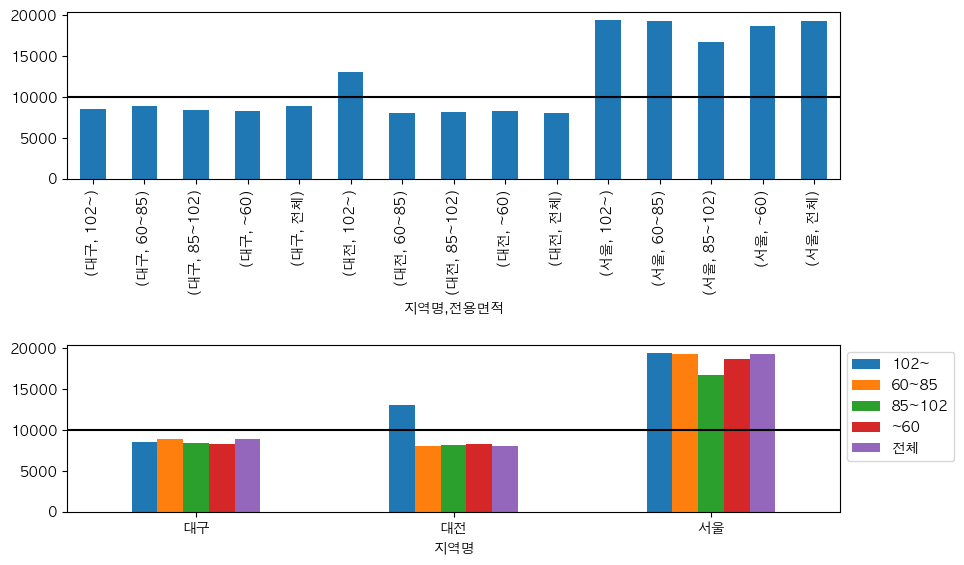

In [15]:
fig=plt.figure(figsize=(10, 6))
ax1, ax2=fig.subplots(2,1)

df56=df_prep.loc[df_prep['지역명'].isin(['서울','대전','대구'])].copy()

## 코드작성
df5a=df56.groupby(['지역명','전용면적'])['평당분양가격'].min()
df5a.plot.bar(ax=ax1)
## 코드작성 끝

## 코드작성
df6a=df56.groupby(['지역명','전용면적'])['평당분양가격'].min().unstack(1)
df6a.plot.bar(ax=ax2, rot=0)
## 코드작성 끝

_=ax1.axhline(y=10000, color='k')
_=ax2.axhline(y=10000, color='k')
_=ax2.legend(bbox_to_anchor=(1,1), loc='upper left')
fig.tight_layout(pad=2)

# 문제7,8
* 주어진 df78을 가지고, name 별로 score의 boxplot을 그리시오
* 문제7: ax1에 pandas plot으로 그리시오
* 문제8: ax2에 seaborn으로 그리시오
*              
* 단, 문제 7,8번 모두에서
* name 별 score 최대값을 기준으로 boxplot의 순서를 정렬하여 나타내시오
* (최대값을 가지고 정렬해야함, 정렬 안될시 감점 있음)
* (힌트: name 별 score 최대값을 갖는 series를 생성하여 사용)

,name,month,day,score
0,A,7,3,58
1,B,7,3,89
2,C,7,3,52
3,A,2,2,84
4,B,2,2,71
5,C,2,2,95
6,A,2,15,96
7,B,2,15,64
8,C,2,15,62
9,A,6,4,52


(34, 4)

<Axes: >

<Axes: xlabel='name', ylabel='score'>

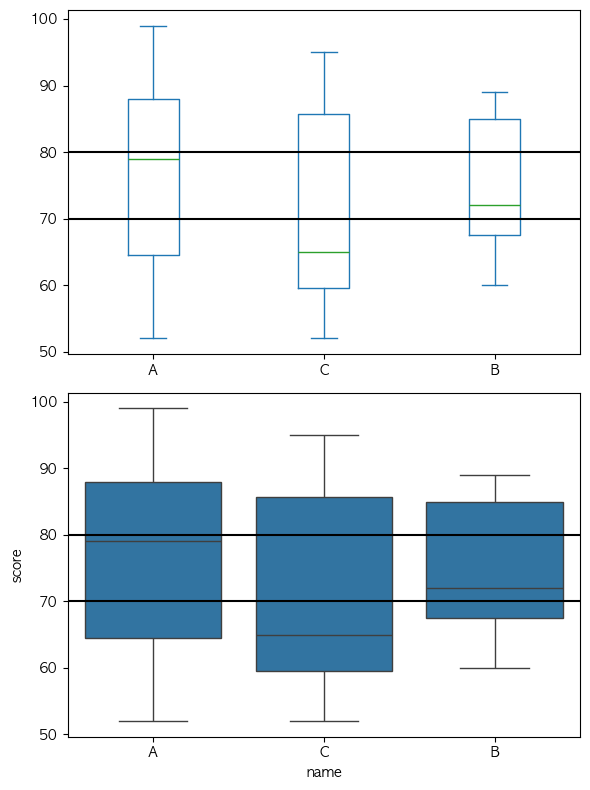

In [16]:
fig=plt.figure(figsize=(6,8))
ax1, ax2=fig.subplots(2,1)

df78=pd.read_table('data/dat_prob7.txt', sep='\t', index_col=0)
df78.head(10)
df78.shape

## ax1 (문제7): 코드작성
df78_max=df78.groupby('name')['score'].max().sort_values(ascending=False) ## 문제7,8에 모두 필요
df7a=df78.pivot_table(index=['month','day'], columns='name', values='score')
df7a=df7a[df78_max.index]
df7a.plot.box(ax=ax1)
## ax1 (문제7): 코드작성 끝

## ax2 (문제8): 코드작성
sns.boxplot(data=df78, x='name',y='score', order=df78_max.index, ax=ax2)
## ax2 (문제8): 코드작성 끝

_=ax1.axhline(y=80, color='k')
_=ax1.axhline(y=70, color='k')
_=ax2.axhline(y=80, color='k')
_=ax2.axhline(y=70, color='k')
fig.tight_layout()

# 문제9
* 주어진 df9을 가지고, 연도별 평당분양가격의 평균을 seaborn의 barplot으로 그렸다.
* 그 위에 아래와 같은 errorbar를 직접 추가하시오
* upper bound: 최대값
* lower bound: 평균 - 표준편차
* (힌트: errorbar pi 참고)

<Axes: xlabel='연도', ylabel='평당분양가격'>

,up,lw
연도,,
2019,42002.4,7029.714723
2020,45655.5,7651.351583
2021,35461.8,8462.640884
2022,34062.6,9920.779734


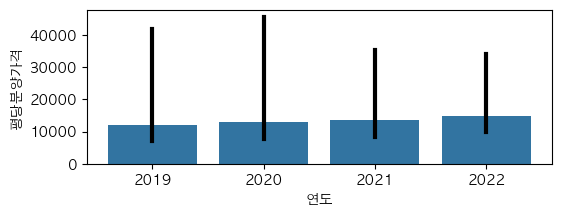

In [17]:
fig=plt.figure(figsize=(6, 2))
ax1=fig.subplots()

df9=df_prep.loc[df_prep['연도'].isin([2019,2020,2021,2022])]

sns.barplot(data=df9,
            x='연도', # group
            y="평당분양가격",
            errorbar=None,
            ax=ax1)

## 코드작성
def get_errorbar_prob10(sr1):
    upper=sr1.max()
    lower=sr1.mean()-sr1.std()
    return pd.Series([upper, lower], index=['up','lw'])

pi_res=df9.groupby('연도')['평당분양가격'].apply(get_errorbar_prob10)
pi_res=pi_res.unstack(1)
pi_res
    
for x_pos, ind in zip(ax1.get_xticks(), pi_res.index):
    up_pos=pi_res.loc[ind, 'up']
    lw_pos=pi_res.loc[ind, 'lw']
    
    _=ax1.plot([x_pos,x_pos],[lw_pos, up_pos], color='k', linewidth=3)

## 코드작성 끝

# 문제10
* 주어진 df10을 가지고 "연도별" "전용면적별" "평당분양가격"의 "중앙값"을 bar그래프로 그리시오
* seaborn 활용하여 ax1에 그리시오 (errorbar=None)
* (힌트: 중앙값 구하는 함수 "median")

<Axes: xlabel='전용면적', ylabel='평당분양가격'>

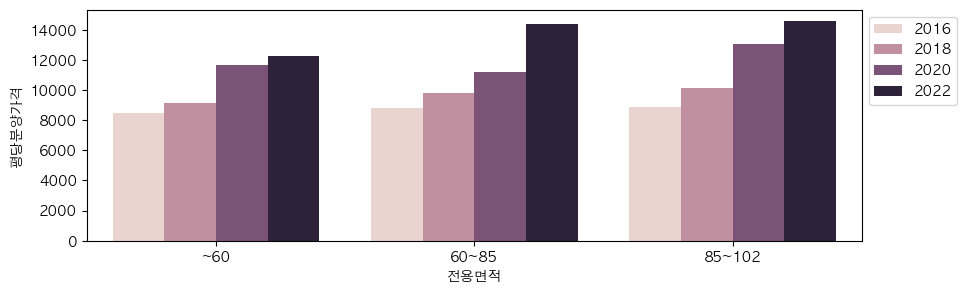

In [18]:
fig=plt.figure(figsize=(10, 3))
ax1=fig.subplots()

df10=df_prep.loc[df_prep['연도'].isin([2016, 2018, 2020, 2022])]
df10=df10.loc[df10['전용면적'].isin(['~60', '60~85', '85~102'])]

## 코드작성
sns.barplot(data=df10, x="전용면적", y="평당분양가격", hue='연도',estimator='median', errorbar=None, ax=ax1)
## 코드작성 끝

_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

# 문제11 (6점)
* dataframe df11a, df11b가 주어져있다.
* df11a를 적당한 format으로 변경한후 df11b와 연결하여 df11d를 만드시오 (3점)
* 그리고 df11d를 가지고, 평균보다 점수가 높은 그룹 (H)과 평균보다 점수가 낮은 그룹 (L)에 대해서 나이의 분포를 그리시오 (3점)

'### df11a'

,name,age,mat,eng,kor
0,A,30,130,440,530
1,B,40,150,410,550
2,C,50,140,400,540
3,D,60,130,300,530
4,E,70,150,310,550
5,F,80,140,330,540


'### df11b'

,age,name,subj,score
0,10,G,eng,410
1,20,H,eng,400
2,30,I,eng,450
3,40,J,eng,330
4,50,K,eng,320
5,60,L,eng,340


'### df11d (출력해야할 결과)'

,name,age,subj,score
0,A,30,eng,440
1,B,40,eng,410
2,C,50,eng,400
3,D,60,eng,300
4,E,70,eng,310
5,F,80,eng,330
0,G,10,eng,410
1,H,20,eng,400
2,I,30,eng,450
3,J,40,eng,330


<Axes: xlabel='class', ylabel='age'>

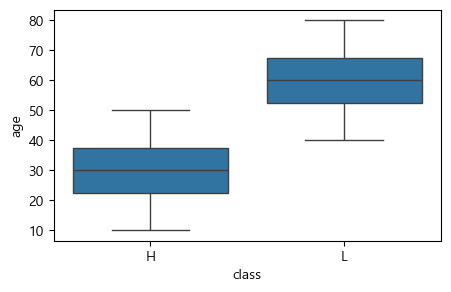

In [37]:
df11a = pd.DataFrame({"name": ['A','B','C','D','E','F'],
                      "age": [30,40,50,60,70,80],
                      "mat": [130, 150,140,130, 150,140],
                      "eng": [440, 410,400, 300, 310, 330],
                      "kor": [530, 550,540,530, 550,540]})

df11b = pd.DataFrame({"age": [10,20,30,40,50,60],
                      "name": ['G','H','I','J','K','L'],
                      "subj": ['eng','eng','eng','eng','eng','eng'],
                      "score": [410, 400,450, 330, 320, 340]})

'### df11a'
df11a
'### df11b'
df11b

## 코드작성
df11c=df11a.melt(id_vars=['name','age'], value_vars=['eng'], var_name='subj',value_name='score')
df11d=pd.concat([df11c, df11b], axis=0)
## 코드작성 끝

'### df11d (출력해야할 결과)'
df11d

fig=plt.figure(figsize=(5, 3))
ax1=fig.subplots()

## 코드작성
ave=df11d['score'].mean()

def func_prob11(x):
    if x>ave:
        return 'H'
    return 'L'
    
df11d['class']=df11d['score'].map(func_prob11)
sns.boxplot(data=df11d, x='class', y='age', ax=ax1)
## 코드작성 끝

# => 문제를 위한 전처리 코드
* ########################################
* df_last, df_first => 전처리 => df_all
* 아래 문제들에서 df_all 사용됨
* ########################################

In [38]:
###########################################
############ df_last (df_prep1) ############
###########################################
df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','

### 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_prep1=df_last.loc[df_last['분양가격(제곱미터)'].notnull()]

### 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형, 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_prep1=df_prep1.copy()
df_prep1['분양가격(제곱미터)']=pd.to_numeric(df_prep1['분양가격(제곱미터)'], errors='coerce')
df_prep1=df_prep1.loc[df_prep1['분양가격(제곱미터)'].notnull()]

### 3) 평당분양가격 column 추가
df_prep1["평당분양가격"]=df_prep1['분양가격(제곱미터)'] * 3.3

### 4) 전용면적 column 추가
def area_prep(x):
    x2=x.replace("모든면적","전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("60이하", "~60").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3

df_prep1["전용면적"] = df_prep1["규모구분"].map(area_prep)

### 5) 필요없는 column 제거
df_prep1=df_prep1.drop(columns=['규모구분','분양가격(제곱미터)'], errors='ignore')

### 6) 전용면적 '전체' 선택 후, 전용면적 drop
df_prep1=df_prep1.loc[df_prep1['전용면적']=='전체'] # df_first가 전용면적 별 데이터가 없음으로 전체만 선택
df_prep1=df_prep1.drop(columns='전용면적', errors='ignore')

############################################
############ df_first (df_prep12) ###########
############################################

df_first = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.rename(columns={'지역':"지역명"}, inplace=True)

df_first_melt['연도']=df_first_melt['기간'].str.split('년').str.get(0).astype(int)
df_first_melt['월']=df_first_melt['기간'].str.split('년').str.get(1)
df_first_melt['월']=df_first_melt['월'].str.replace('월','').astype(int)
df_prep12=df_first_melt.drop(columns='기간')

###############################################
#################### df_all ###################
###############################################

## concat
df_all=pd.concat((df_prep1, df_prep12), axis=0)
## reset_index
df_all=df_all.reset_index(drop=True)

df_all

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
1,인천,2015,10,10437.9
2,경기,2015,10,10355.4
3,부산,2015,10,10269.6
4,대구,2015,10,8850.6
...,...,...,...,...
1918,전북,2015,8,6580.0
1919,전남,2015,8,6289.0
1920,경북,2015,8,7037.0
1921,경남,2015,8,7665.0


# 문제12
* 주어진 df12에서 2022년 10월 평당분양가격이 세번째로 높은 지역을 정하고,
* 그 지역의 연도별 평당분양가격의 평균을 seaborn barplot으로 그리시오
* 또한, 그 지역의 이름을 제목에 넣으시오 (이 부분은 코드 맨 마지막에 작성되어 있음, 이 코드 변경하지 말것)

<Axes: xlabel='연도', ylabel='평당분양가격'>

Text(0.5, 1.0, '부산')

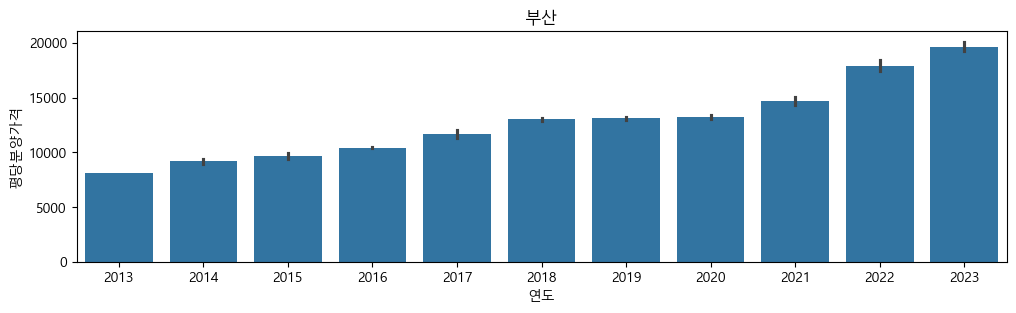

In [39]:
fig=plt.figure(figsize=(12,3), dpi=100)
ax1=fig.subplots()

df12=df_all.copy()

## 코드작성
sr_2022_10=df12.loc[(df12['연도']==2022)&(df12['월']==10)].set_index('지역명')['평당분양가격'].sort_values(ascending=False)
reg1=sr_2022_10.index[2]

df12a=df12.loc[df12['지역명']==reg1]
sns.barplot(data=df12a, y='평당분양가격', x='연도',estimator='mean',ax=ax1)
## 코드작성 끝

ax1.set_title('{}'.format(reg1)) # 그 지역의 이름을 제목에 넣는 코디임, 코드 변경하지 말것

# 문제13
* 주어진 df13에서, 지역별 평당분양가격의 평균을 seaborn barplot으로 그리시오
* 단, errorbar는 PI(Percentile interval): 30 ~ 70 로 하시오
* (errorbar틀리고 그릴시 부분점수 있음)


<Axes: xlabel='지역명', ylabel='평당분양가격'>

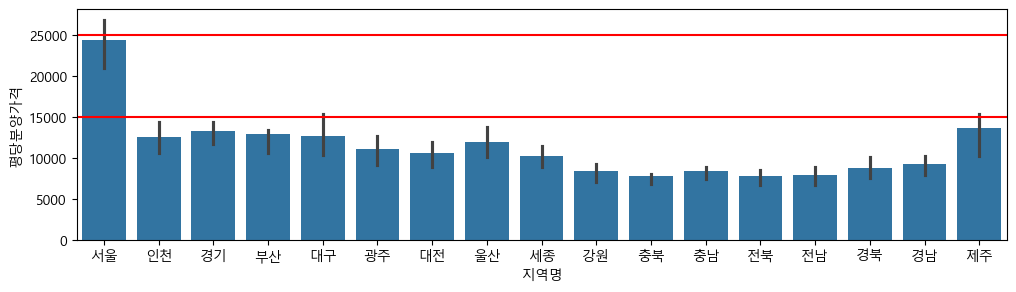

In [45]:
fig=plt.figure(figsize=(12,3), dpi=100)
ax1=fig.subplots()

df13=df_all.copy()

## 코드작성
sns.barplot(data=df13,
            x='지역명', # group
            y="평당분양가격",
            errorbar=('pi',40), # Percentile interval: 30 ~ 70 
            ax=ax1)

_=ax1.axhline(y=25000, color='r')
_=ax1.axhline(y=15000, color='r')
